### 캘리포니아 주택 가격 데이터 분석

In [1]:
import pandas as pd
df = pd.read_csv('c:/vscode/data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##### 탐색적 데이터 분석(Exploratory data analysis, EDA)

In [2]:
#바다 근접 특성
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

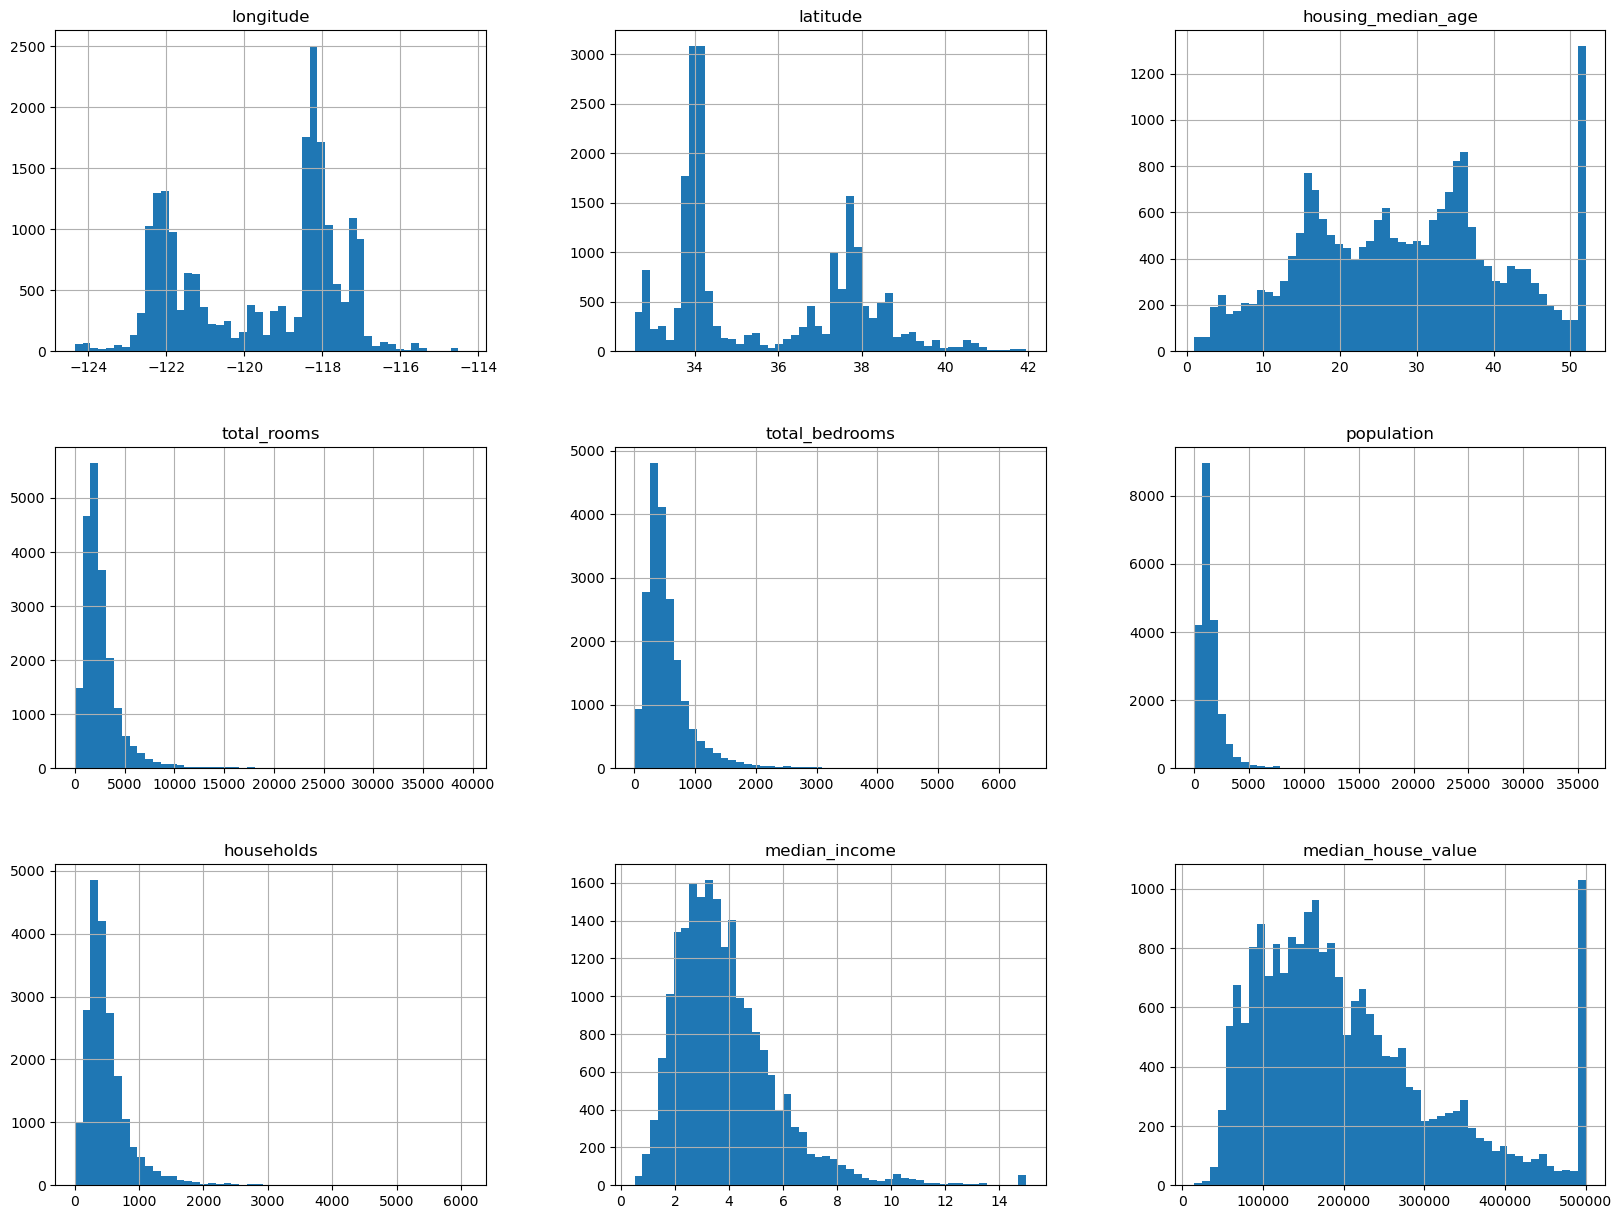

In [3]:
#히스토그램
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [4]:
#랜덤시드 고정
import numpy as np
np.random.seed(10)

[Text(0.5, 0, 'longitude'), Text(0, 0.5, 'latitude')]

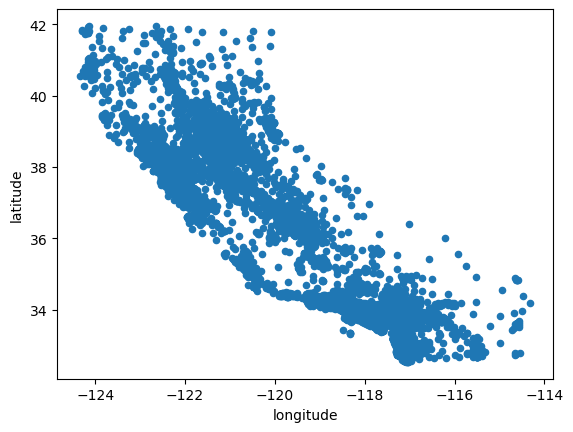

In [5]:
#지리적 데이터 시각화
ax = df.plot(kind="scatter", x="longitude", y="latitude")
ax.set(xlabel='longitude', ylabel='latitude') #경도, 위도

[Text(0.5, 0, 'longitude'), Text(0, 0.5, 'latitude')]

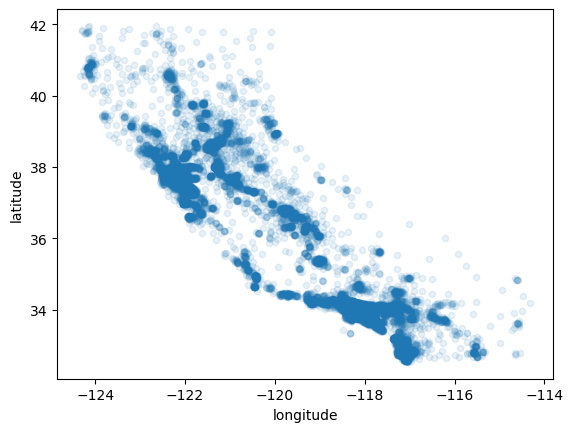

In [7]:
#데이터 포인트가 밀집된 지역을 표현하기 위하여 투명도 조절
ax = df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
ax.set(xlabel='longitude', ylabel='latitude') #경도, 위도

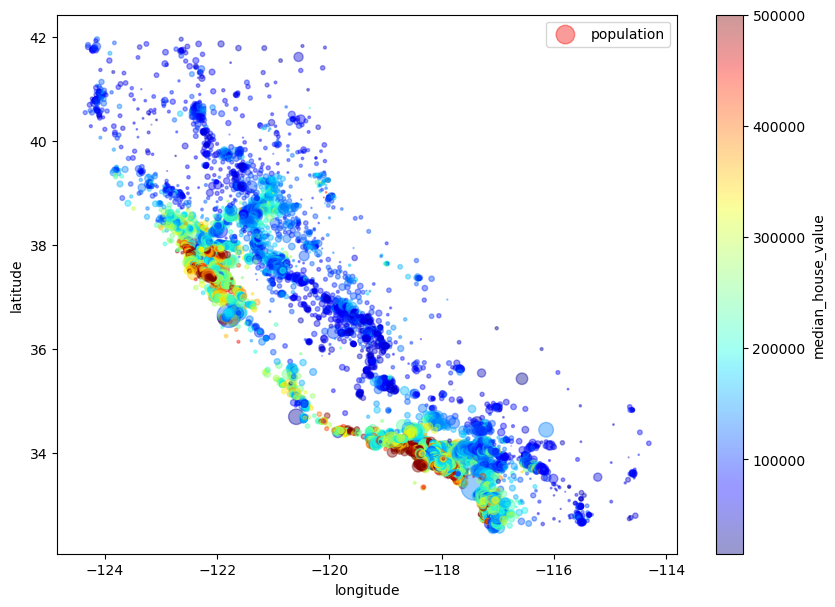

In [9]:
#s 포인트 사이즈:인구, c: 주택가격, jet: blue~red 컬러 옵션, sharex=False x축 라벨을 공유하지 않음
ax = df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=df["population"]/100, label="population", figsize=(10,7), 
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, 
             sharex=False)
ax.set(xlabel='longitude', ylabel='latitude') #경도, 위도
plt.legend()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

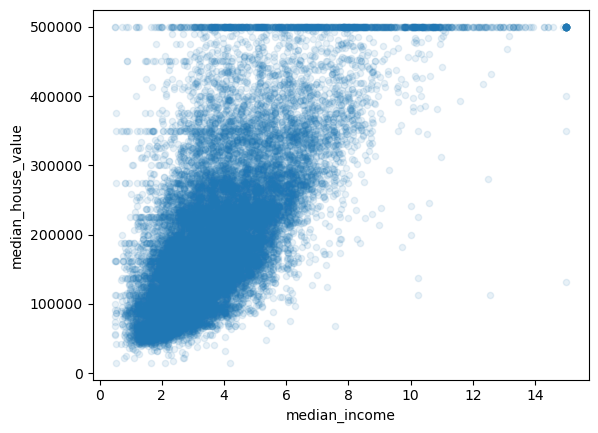

In [10]:
#산점도(x: 중위소득, y:중위주택가격)
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [12]:
#원핫인코딩
df2 = pd.get_dummies(data=df, columns=['ocean_proximity'])
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


<AxesSubplot:>

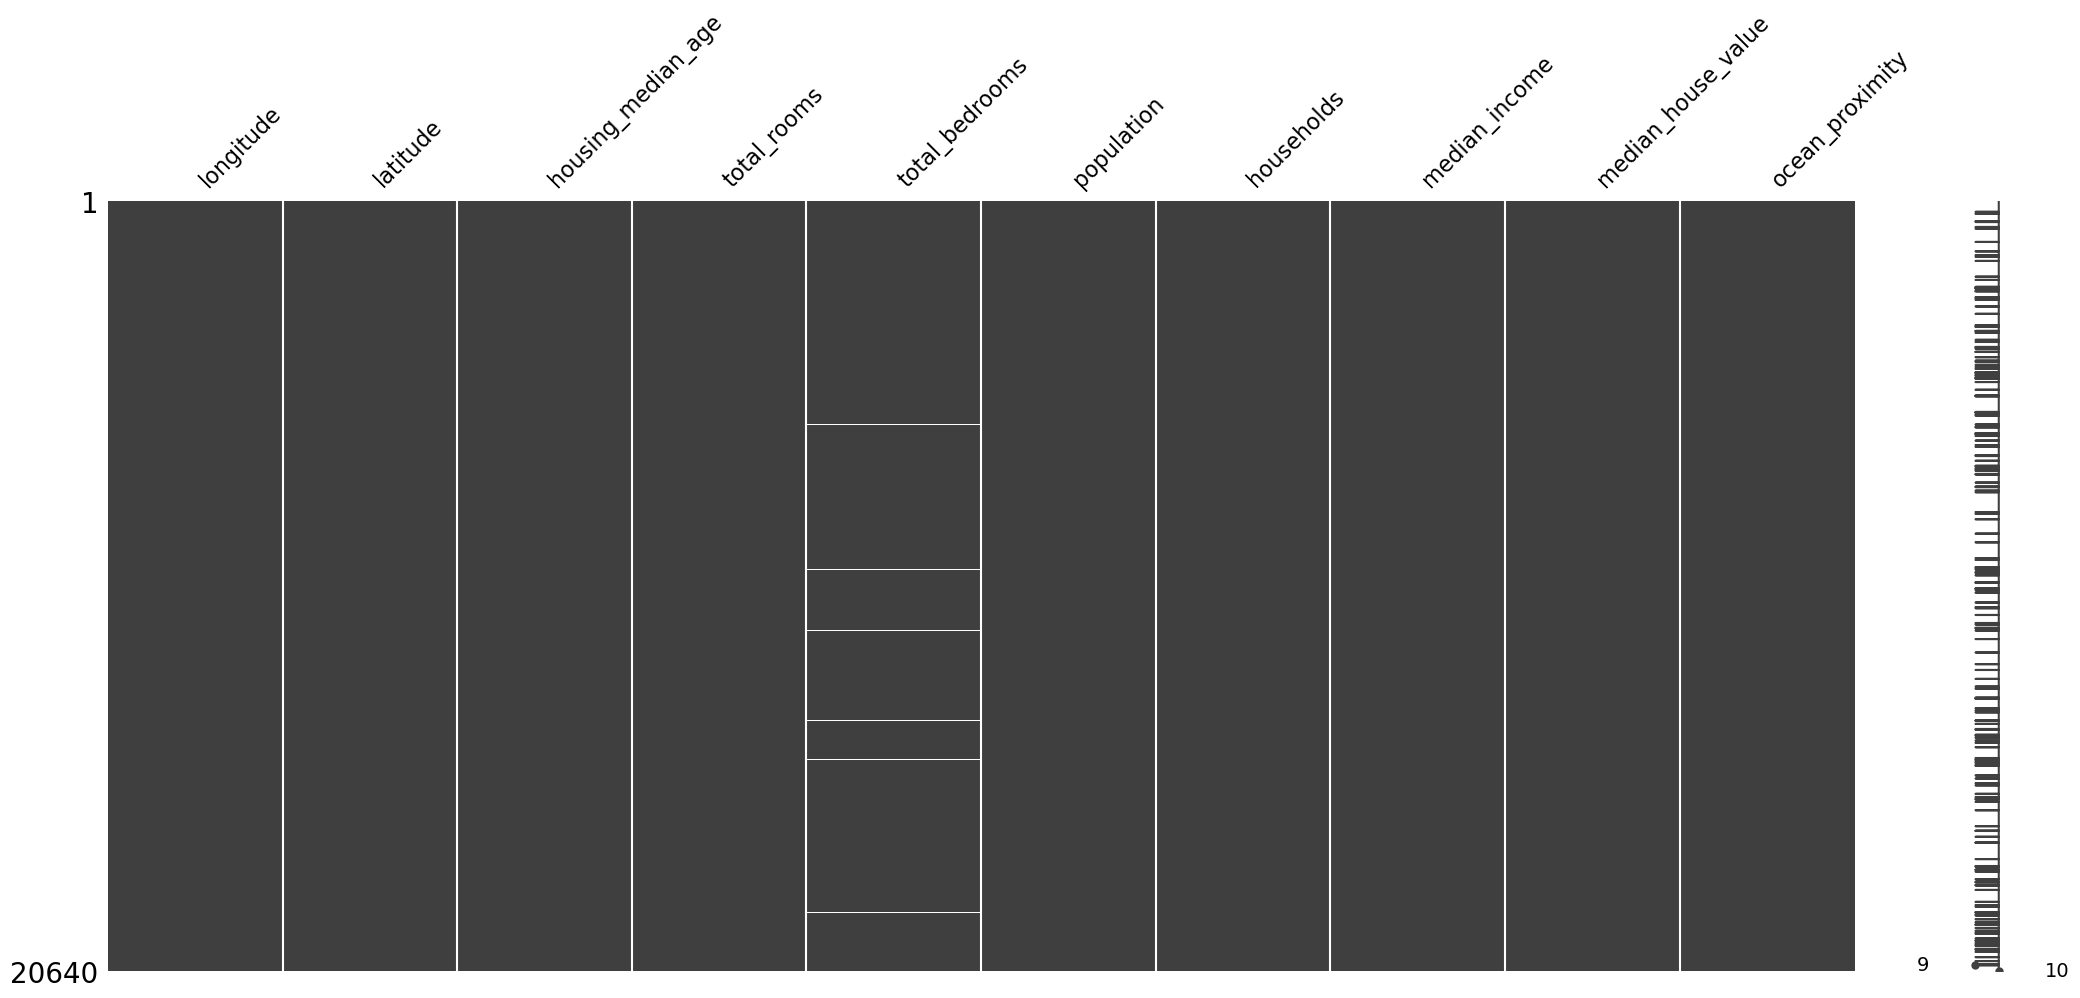

In [13]:
import missingno as msno
msno.matrix(df)

In [14]:
#결측값을 각각의 변수의 중위수로 치환
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df2)
X = imputer.transform(df2)
df_tr = pd.DataFrame(X, columns=df2.columns)
df_tr.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,0.0,1.0,0.0,0.0,0.0


In [15]:
#평균주택가격을 y로 사용
# 레이블로 사용
housing_labels = df_tr["median_house_value"].copy()
# 레이블 삭제
df_tr.drop("median_house_value", axis=1, inplace = True)

In [16]:
#정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_tr)
scaled_df = scaler.transform(df_tr)
scaled_df.shape

(20640, 13)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_df, housing_labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(16512, 13) (4128, 13)


In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)
# 평균제곱근오차 : 예측값과 실제값을 뺀 후 제곱한 값들을 다 더하고 n으로 나눈 값의 제곱근(평균제곱오차의 제곱근)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
#오차가 너무 크므로 다른 모형 사용

68695.25238933765


In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

68453.76183697989


In [22]:
from sklearn.svm import SVR

#Support Vector Regression
svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

107136.80965189687


In [23]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_jobs = -1)
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
#가장 좋은 성능

47962.05877828862


In [24]:
#파라미터 튜닝(시간이 오래 걸리는 작업)
from sklearn.model_selection import GridSearchCV

#max_features : 트리를 만드는데 사용할 변수의 갯수
param_grid = [{'n_estimators': [3, 10, 30, 50, 100], 
               'max_features': [2, 4, 6, 8]}, ]

# n_jobs=-1 모든 cpu core 사용
forest_reg = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100]}])

In [25]:
#실험을 통해 얻은 최적의 파라미터
grid_search.best_params_

{'max_features': 8, 'n_estimators': 100}

In [26]:
#최적의 모형
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_jobs=-1, random_state=0)

<BarContainer object of 13 artists>

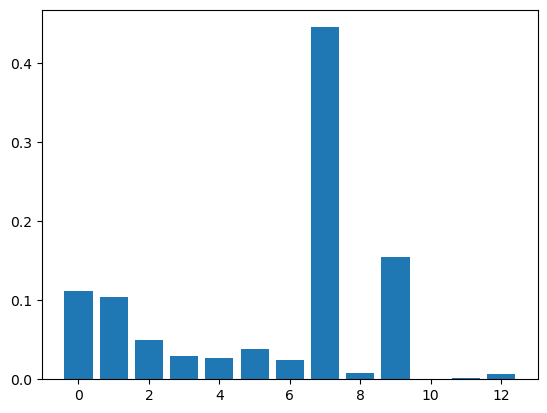

In [27]:
#랜덤 포레스트 모형을 만드는데 가장 기여도가 큰 변수 확인
feature_importances = grid_search.best_estimator_.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
#인덱스 7(8번째 변수) 평균수입(median_income)

In [29]:
#RandomizedSearchCV() 최근에 많이 사용되고 있는 파라미터 최적화 함수
#매개변수의 범위를 지정해주면 무작위로 매개변수를 조합하여 최적의 성능 측정
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
 'n_estimators': randint(low=1, high=100),
 'max_features': randint(low=1, high=8),
 }

forest_reg = RandomForestRegressor(random_state=0, n_jobs=-
1)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, cv=5, random_state=0)
rnd_search.fit(X_train, y_train)
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],
cvres["params"]):
 print(np.sqrt(mean_score), params)

0.9016817721718511 {'max_features': 5, 'n_estimators': 48}
0.9032492562904457 {'max_features': 6, 'n_estimators': 65}
0.9017108857319673 {'max_features': 4, 'n_estimators': 68}
0.8942648177868636 {'max_features': 2, 'n_estimators': 84}
0.9014587384026967 {'max_features': 6, 'n_estimators': 37}
0.9041984858667547 {'max_features': 7, 'n_estimators': 89}
0.8719389684828966 {'max_features': 1, 'n_estimators': 13}
0.8985873338445819 {'max_features': 3, 'n_estimators': 66}
0.9025367466795287 {'max_features': 7, 'n_estimators': 40}
0.9041984858667547 {'max_features': 7, 'n_estimators': 89}


In [30]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=89, n_jobs=-1,
                      random_state=0)

In [31]:
final_model = rnd_search.best_estimator_
y_pred = final_model.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
#결론 : 주택가격에 가장 큰 영향을 주는 특성은 평균소득, 예측오차는 약 48929달러

47937.66191923853
